In [1]:
import os
import obspy
import matplotlib.pyplot as plt
%matplotlib inline
%run helperfunctions.ipynb
os.getcwd()

'/Users/albertkong/Dropbox (Personal)/1. Academics - S/6. LSE - S/X. Practitioners Challenge/1. Code'

In [2]:
os.chdir('lse_challenge/data')

In [3]:
# np.random.seed(1)
# Signal List
os.chdir('signal')
signals = []
signal_files = os.listdir()
for sigfile in signal_files:
    tmp_trace = obspy.read(sigfile)
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    signals.append([tmp_trace, trace_mat, cutlength, 1])
    
    

# Noise List
os.chdir('../noise')
noise_files = os.listdir()
for noisefile in noise_files[0:2000]: #Need to remove index for actual dataset
    tmp_trace = obspy.read(noisefile)
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    signals.append([tmp_trace, trace_mat, cutlength, 0])
    
    

os.chdir('../')
os.getcwd()

'/Users/albertkong/Dropbox (Personal)/1. Academics - S/6. LSE - S/X. Practitioners Challenge/X. Data/lse_challenge/data'

In [4]:
sig_df = pd.DataFrame(signals, columns = ["tr", "trmatrix_cut", "cutlength", "signal"])

In [5]:
trace_df.head()

,tr,trmatrix_cut,cutlength,signal
0,"[(0.0, 0.060020010005, 0.01004002001, 0.010060...","[[0.0607403701851, 0.0607603801901, 0.05078039...",37,1
1,"[(0.0, -0.02995997999, -0.07991995998, -0.0798...","[[-0.0805952976488, -0.110555277639, -0.060515...",235,1
2,"[(0.0, -0.04, 0.06, 0.07, 0.04, -0.01, -0.04, ...","[[-0.01, -0.02, -0.08, -0.06, 0.01, -0.04, -0....",72,1
3,"[(0.0, 0.0100350175088, 0.0300700350175, -0.02...","[[0.116858429215, 0.0768934467234, 0.086928464...",767,1
4,"[(0.0, -0.02, 0.02, -0.1, -0.08, -0.02, -0.07,...","[[-0.03, -0.02, -0.06, -0.09, -0.08, -0.07, -0...",715,1


In [6]:
ind = 89
tr = trace_df.iloc[ind]["trmatrix_cut"]

In [7]:
theta = np.random.uniform()*2*np.pi

In [33]:
tr[0][0:10], tr[1][0:10], tr[2][0:10]

(array([ 0.01842371,  0.07142171, -0.01958029,  0.01841771,  0.02241571,
         0.00741371, -0.03058829, -0.0685903 ,  0.0864077 ,  0.1054057 ]),
 array([ 0.01656728, -0.04349325, -0.00955378,  0.00138569,  0.00532516,
         0.03526463, -0.0247959 , -0.05185643, -0.02091696,  0.03102251]),
 array([-0.00795798,  0.0260005 , -0.05704102,  0.03691746,  0.05587594,
        -0.00116558,  0.1417929 ,  0.05575138, -0.05729015,  0.04766833]))

In [36]:
rot_xyz(tr, 0, -np.pi, 0)

array([[-0.01842371, -0.07142171,  0.01958029, ..., -0.14842871,
        -0.02742671, -0.01642471],
       [ 0.01656728, -0.04349325, -0.00955378, ..., -0.06978139,
        -0.16784192, -0.01390245],
       [ 0.00795798, -0.0260005 ,  0.05704102, ...,  0.16635418,
        -0.1196043 , -0.17256278]])

In [16]:
tr1 = rot_xyz(tr, theta, theta, theta)

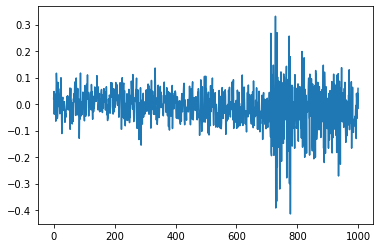

In [19]:
plt.plot(tr1[2])

In [13]:
1000-trace_df.iloc[ind]["cutlength"]

712